# Concert Price Predictor

This Jupyter Notebook analyzes ticket sales data from various sources, including Events, Embrace, TicketWeb, and Socials. The analysis involves data cleaning, merging datasets, and building predictive models to understand the factors influencing ticket resale margins. The notebook uses machine learning techniques such as Linear Regression and Random Forest Regressor to evaluate different feature subsets and predict ticket resale margins for specific artists.

In [61]:
import pandas as pd

In [62]:
path = "../../Documents/Ticket Sales.xlsx"
events = pd.read_excel(path, sheet_name="Events")
embrace = pd.read_excel(path, sheet_name="Embrace")
ticketweb = pd.read_excel(path, sheet_name="TicketWeb")
socials = pd.read_excel(path, sheet_name="Socials")

In [63]:
events["Min Cost"] = pd.to_numeric(events["Min Cost"], errors='coerce')
events["Max Resell"] = pd.to_numeric(events["Max Resell"], errors='coerce')
events = events[events["Min Cost"] > 0]
events = events[events["Max Resell"] > 0]


In [64]:
socials

,Artist,instagram_username,instagram_followers,spotify_id,spotify_genre,spotify_followers,spotify_popularity,spotify_listeners,twitter_username,twitter_followers,stubhub_url,stubhub_favourites
0,Taylor Swift,taylorswift,284000000.0,06HL4z0CvFAxyc27GXpf02,pop,125787651,100,90500000,taylorswift13,94700000.0,/taylor-swift-tickets/performer/136034,42564.0
1,Billie Eilish,billieeilish,121000000.0,6qqNVTkY8uBg9cP3Jd7DAH,art pop,102103754,96,107100000,billieeilish,7500000.0,/billie-eilish-tickets/performer/100271552,10766.0
2,Dua Lipa,dualipa,87000000.0,6M2wZ9GZgrQXHCFfjv46we,dance pop,44991296,88,64200000,DUALIPA,10300000.0,/dua-lipa-tickets/performer/1507400,4594.0
3,Shawn Mendes,shawnmendes,72000000.0,7n2wHs1TKAczGzO7Dd2rGr,canadian pop,43642266,85,47800000,ShawnMendes,25700000.0,/shawn-mendes-tickets/performer/1497872,320.0
4,Travis,travisscott,59000000.0,0Y5tJX1MQlPlqiwlOH1tJY,rap,34394049,94,71500000,trvisxx,12100000.0,/travis-scott-tickets/performer/730778,2931.0
...,...,...,...,...,...,...,...,...,...,...,...,...
189,Angrybaby,angrybaby_music,15000.0,5TAU3fcCF32FqKMrdbXfRr,stutter house,17592,52,674800,yumi_angrybaby,1488.0,/angrybaby-tickets/performer/150077005,1.0
190,ZACK FOX,zackfox,15000.0,1UH80jhsYsFztK0anu2FNS,indie hip hop,175109,51,484400,zackfox,673800.0,/zack-fox-tickets/performer/100312065,11.0
191,DeathPack,deathpackbmx,5337.0,09C3CKFxKEw1n1Z7kvT3jb,dark clubbing,75636,47,335600,deathpact,17300.0,/deathpact-tickets/performer/150035254,1.0
192,"ENTOURAGE FEST: OGUZ, ALT8, LUCA LUSH",entouragefest,1239.0,NaN,NaN,0,0,0,NaN,NaN,/l-entourage-tickets/category/138304072,0.0


In [65]:

"""
Filters the 'socials' DataFrame to include only rows where:
- 'spotify_popularity' is not null and greater than 0
- 'spotify_listeners' is greater than 0
- 'instagram_followers' is greater than 0

This ensures that the DataFrame contains only relevant and non-zero social media metrics.
"""
socials = socials[socials["spotify_followers"]>0]
socials = socials[socials["spotify_popularity"]>0]
socials = socials[socials["spotify_listeners"]>0]
socials = socials[socials["instagram_followers"]>0]

In [66]:
merged_df = pd.merge(events, socials, on='Artist', how='inner')
merged_df["Margin"] = merged_df["Max Resell"] - merged_df["Min Cost"]
merged_df

,Artist,Date,Venue,Location,# of comments,Presale,Sellout Date,Sections,Min Cost,Max Resell,...,spotify_id,spotify_genre,spotify_followers,spotify_popularity,spotify_listeners,twitter_username,twitter_followers,stubhub_url,stubhub_favourites,Margin
0,50 cent,2024-07-20,REBEL,Toronto,NaN,NaT,NaN,NaN,37.00,50.0,...,3q7HBObVc0L8jNeTe5Gofh,east coast hip hop,15997856,85,38800000,50cent,13100000.0,/50-cent-tickets/performer/7747,4487.0,13.00
1,50 cent,2024-07-20,CABANA,Toronto,79.0,2024-07-04,2024-07-19 00:00:00,NaN,35.00,130.0,...,3q7HBObVc0L8jNeTe5Gofh,east coast hip hop,15997856,85,38800000,50cent,13100000.0,/50-cent-tickets/performer/7747,4487.0,95.00
2,Alan Walker,2025-02-07,REBEL,Toronto,NaN,NaT,NaN,NaN,55.75,122.0,...,7vk5e3vY1uw9plTHJAMwjN,electro house,39729872,82,29100000,IAmAlanWalker,861100.0,/alan-walker-tickets/performer/1513630,252.0,66.25
3,AlleyCVT,2024-11-01,AXIS,Toronto,75.0,NaT,NaN,NaN,36.00,134.0,...,4JxRK2gxmri7L7OWaxnVD1,NaN,50124,50,335900,ItsALLEYCVT,4932.0,/alleycvt-tickets/performer/150075047,18.0,98.00
4,Anderson .Paak,2024-09-05,HISTORY,Toronto,NaN,NaT,NaN,NaN,80.00,240.0,...,3jK9MiCrA42lLAdMGUZpwa,escape room,2595859,79,20600000,NaN,NaN,/anderson-paak-tickets/performer/1508092,1374.0,160.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Tyga,2024-08-17,CABANA,Toronto,10.0,2024-07-22,NaN,NaN,32.00,75.0,...,5LHRHt1k9lMyONurDHEdrp,hip hop,7017694,79,21000000,Tyga,4500000.0,/tyga-tickets/performer/508677,47.0,43.00
87,Usher,2024-09-24,SCOTIABANK,Toronto,NaN,NaT,NaN,NaN,137.00,250.0,...,23zg3TcAtWQy7J6upgbUnj,atl hip hop,12375393,83,40800000,Usher,11500000.0,/usher-tickets/performer/5062,12596.0,113.00
88,Vampire Weekend,2024-09-24,NaN,Toronto,NaN,NaT,NaN,NaN,60.00,30.0,...,5BvJzeQpmsdsFp4HGUYUEx,baroque pop,1987659,67,5000000,vampireweekend,276500.0,/vampire-weekend-tickets/performer/254738,899.0,-30.00
89,Wave to earth,2024-10-27,HISTORY,Toronto,NaN,NaT,NaN,NaN,55.50,218.0,...,5069JTmv5ZDyPeZaCCXiCg,korean city pop,3352062,77,8199999,wave_to_earth,76800.0,/wave-to-earth-tickets/performer/150042345,519.0,162.50


In [67]:
merged_df = merged_df[merged_df["Location"] == "Toronto"]
merged_df = merged_df[merged_df["Venue"].notnull()]
merged_df.drop_duplicates(inplace=True)



In [68]:
merged_df = merged_df[["Artist", "Venue", "Date", "Min Cost", "Max Resell", "Margin", "spotify_followers", "spotify_popularity", "spotify_listeners", "instagram_followers",'twitter_followers', 'stubhub_favourites']]
merged_df.dropna(inplace=True)


In [78]:
merged_df

,Artist,Venue,Date,Min Cost,Max Resell,Margin,spotify_followers,spotify_popularity,spotify_listeners,instagram_followers,twitter_followers,stubhub_favourites
0,50 cent,REBEL,2024-07-20,37.00,50.0,13.00,15997856,85,38800000,34000000.0,13100000.0,4487.0
1,50 cent,CABANA,2024-07-20,35.00,130.0,95.00,15997856,85,38800000,34000000.0,13100000.0,4487.0
2,Alan Walker,REBEL,2025-02-07,55.75,122.0,66.25,39729872,82,29100000,10000000.0,861100.0,252.0
3,AlleyCVT,AXIS,2024-11-01,36.00,134.0,98.00,50124,50,335900,105000.0,4932.0,18.0
6,Atarashi,HISTORY,2024-10-06,60.00,50.0,-10.00,844433,60,1200000,1000000.0,13000.0,171.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84,Two Friends,HISTORY,2025-01-31,60.50,88.0,27.50,229637,57,1400000,410000.0,45500.0,121.0
85,Tyga,REBEL,2024-08-17,30.00,40.0,10.00,7017694,79,21000000,46000000.0,4500000.0,47.0
86,Tyga,CABANA,2024-08-17,32.00,75.0,43.00,7017694,79,21000000,46000000.0,4500000.0,47.0
87,Usher,SCOTIABANK,2024-09-24,137.00,250.0,113.00,12375393,83,40800000,13000000.0,11500000.0,12596.0


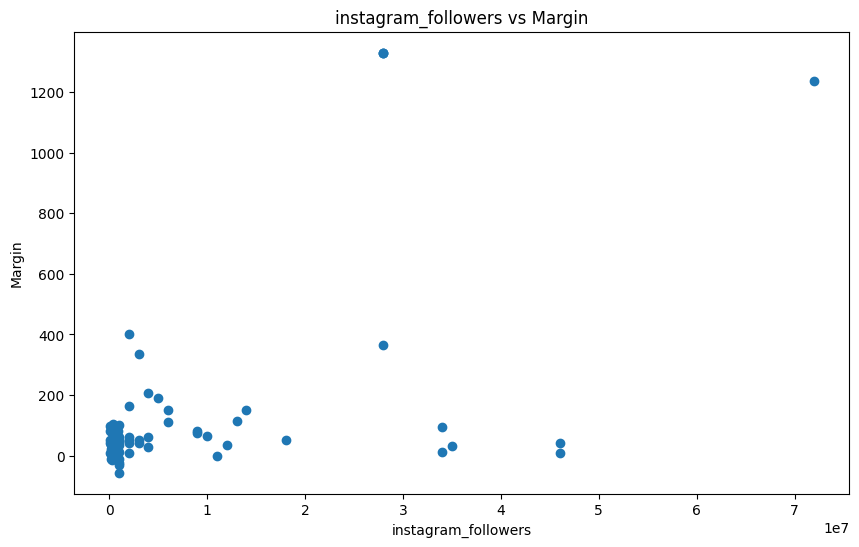

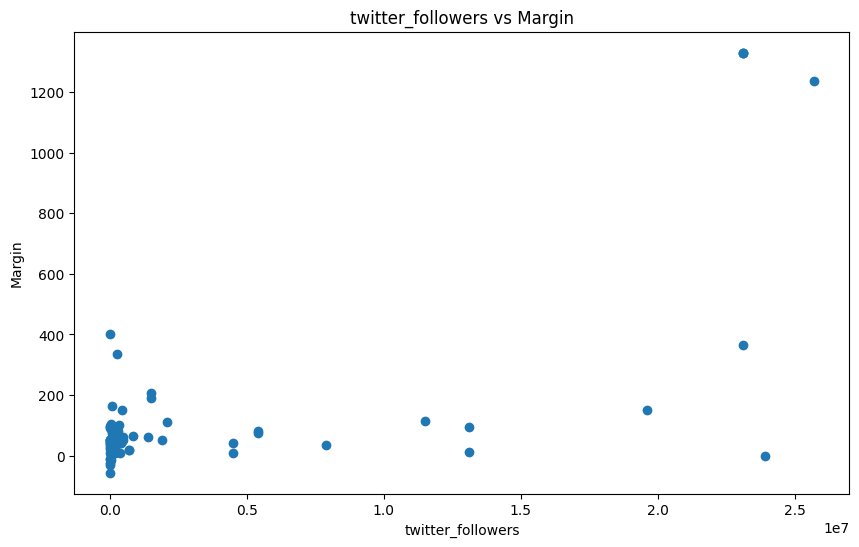

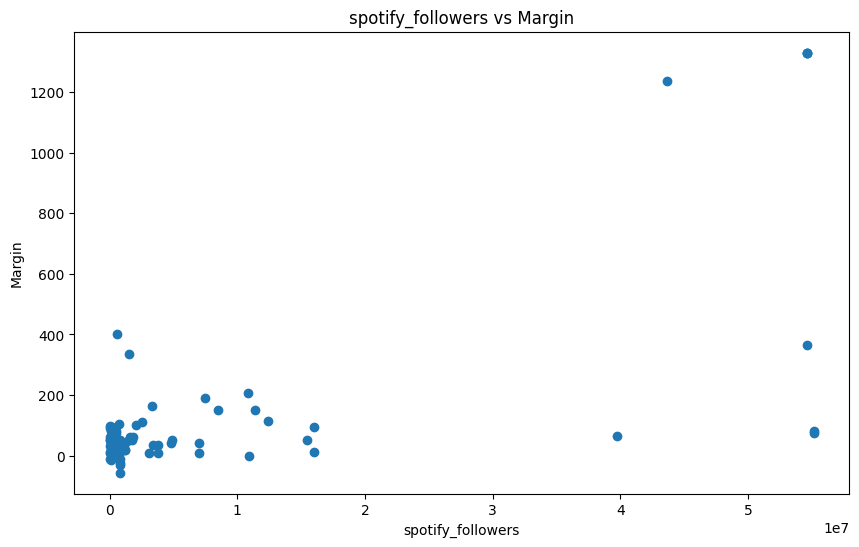

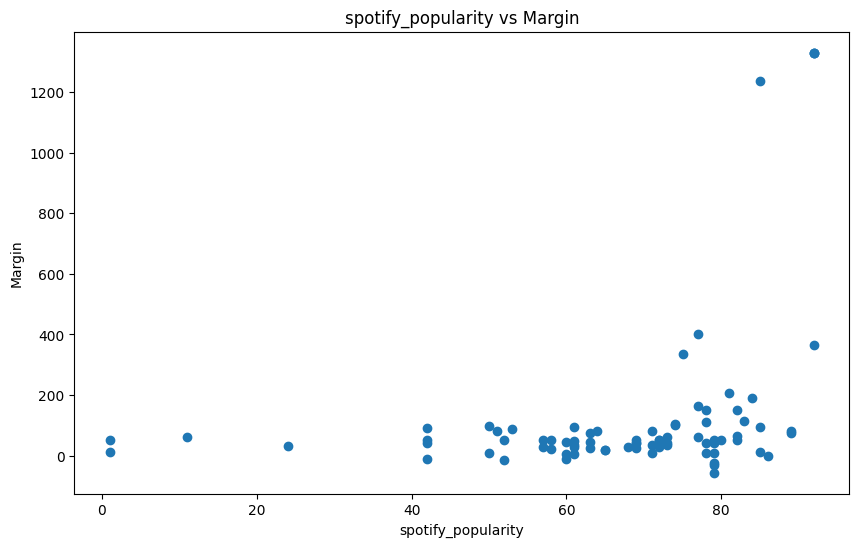

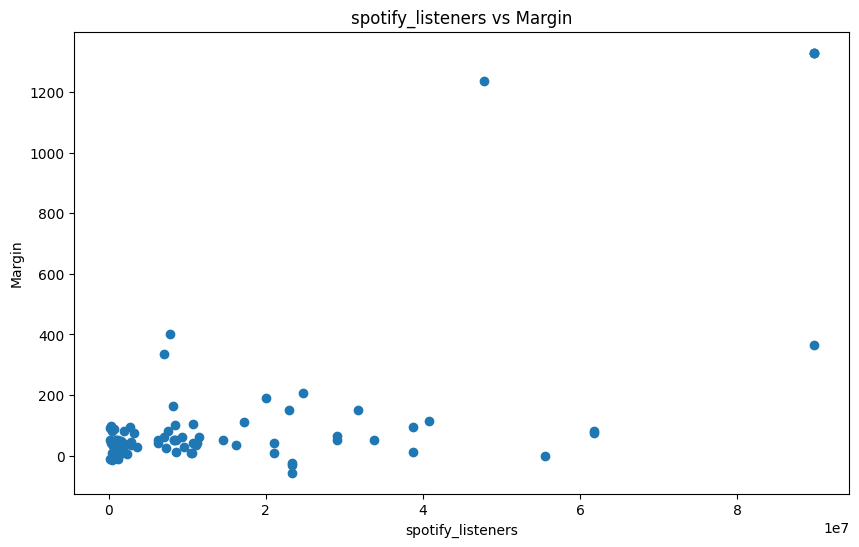

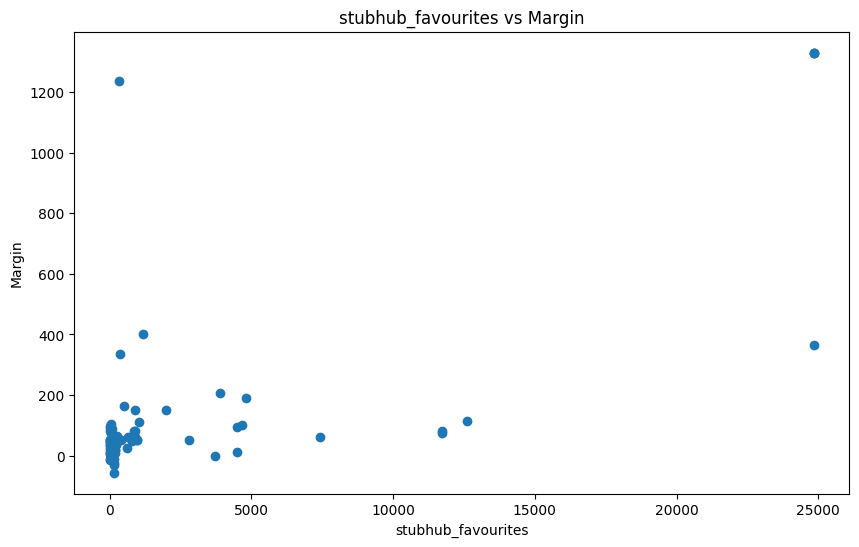

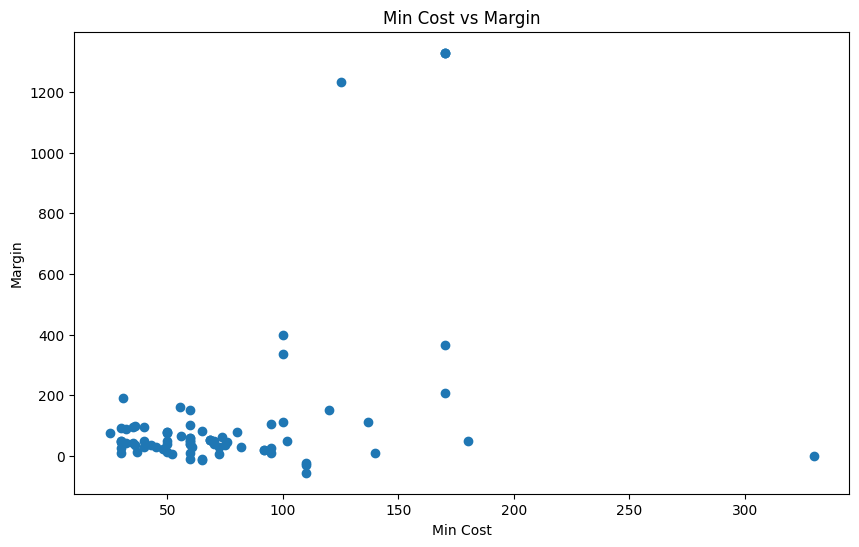

In [69]:

import matplotlib.pyplot as plt

# Plot a graph between each feature and margin
features = ['instagram_followers', 'twitter_followers', 'spotify_followers', 
            'spotify_popularity', 'spotify_listeners', 'stubhub_favourites', 'Min Cost']

for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_df[feature], merged_df['Margin'])
    plt.title(f'{feature} vs Margin')
    plt.xlabel(feature)
    plt.ylabel('Margin')
    plt.show()

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the features and target variable
features = ['Artist', 'Venue',  'instagram_followers', 'twitter_followers',
            'spotify_followers', 'spotify_popularity', 'spotify_listeners',
            'stubhub_favourites', 'Min Cost']
tfeatures = ['Venue',  'instagram_followers', 'twitter_followers',
            'spotify_followers', 'spotify_popularity', 'spotify_listeners',
            'stubhub_favourites']
X = merged_df[features]
y = merged_df['Margin']  # Change target variable to 'Margin'

# Handle categorical data
X = pd.get_dummies(X, columns=['Venue'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
lr = LinearRegression()
lr.fit(X_train.iloc[:, 1:], y_train)

# Make predictions
y_pred = lr.predict(X_test.iloc[:, 1:])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 132800.05


In [71]:
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the features and target variable
features = [  'instagram_followers', 'twitter_followers',
            'spotify_followers', 'spotify_popularity', 'spotify_listeners',
            'stubhub_favourites', 'Min Cost']
X = merged_df[features]
y = merged_df['Margin']

# Handle categorical data
# X = pd.get_dummies(X, columns=['Venue'], drop_first=True)
# Initialize a dictionary to store the scores of each subset
subset_scores = {}


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_subsets(X_train, y_train, X_test, y_test):
    best_subset = None
    best_mse = float('inf')
    best_features = None

    # Iterate over all possible subsets of features
    for i in range(1, len(features) + 1):
        for subset in combinations(features, i):
            subset = list(subset)
            # Train the model
            lr = LinearRegression()
            lr.fit(X_train[subset], y_train)
            # Make predictions
            y_pred = lr.predict(X_test[subset])
            # Calculate MSE
            mse = mean_squared_error(y_test, y_pred)
            # Update the best subset if the current one is better
            if mse < best_mse:
                best_mse = mse
                best_subset = subset

    return best_subset, best_mse

# Evaluate all possible subsets
best_subset, best_mse = evaluate_subsets(X_train, y_train, X_test, y_test)

print(f'Best subset of features: {best_subset}')
print(f'Best MSE: {best_mse:.2f}')



Best subset of features: ['spotify_followers', 'spotify_popularity', 'Min Cost']
Best MSE: 33987.39


In [72]:
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define the features and target variable
features = ['instagram_followers', 'twitter_followers', 'spotify_followers', 'spotify_popularity', 'spotify_listeners', 'stubhub_favourites', 'Min Cost']
X = merged_df[features]
y = merged_df['Margin']

# Initialize a dictionary to store the scores of each subset
subset_scores = {}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate over all possible subsets of features
for i in range(1, len(features) + 1):
    for subset in combinations(features, i):
        subset = list(subset)
        # Train the model
        lr = LinearRegression()
        lr.fit(X_train[subset], y_train)
        # Evaluate the model
        score = lr.score(X_test[subset], y_test)
        # Store the subset and its corresponding score
        subset_scores[tuple(subset)] = score

# Find the best subset
best_subset = max(subset_scores, key=subset_scores.get)
best_score = subset_scores[best_subset]

print(f'Best subset of features: {best_subset}')
print(f'Best Score: {best_score:.4f}')

Best subset of features: ('spotify_followers', 'spotify_popularity', 'Min Cost')
Best Score: 0.6674


In [73]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train.iloc[:, 1:], y_train)

# Make predictions
y_pred_rf = rf.predict(X_test.iloc[:, 1:])

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf:.2f}')

Mean Squared Error (Random Forest): 51935.70


In [74]:
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define the features and target variable
features = ['instagram_followers', 'twitter_followers', 'spotify_followers', 
            'spotify_popularity', 'spotify_listeners', 'stubhub_favourites', 'Min Cost']
X = merged_df[features]
y = merged_df['Margin']

# Initialize a dictionary to store the scores of each subset
subset_scores = {}

# Iterate over all possible subsets of features
for i in range(1, len(features) + 1):
    for subset in combinations(features, i):
        subset = list(subset)
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X[subset], y, test_size=0.2, random_state=42)
        # Train the model
        rf = RandomForestRegressor(random_state=42)
        rf.fit(X_train, y_train)
        # Evaluate the model
        score = rf.score(X_test, y_test)
        # Store the subset and its corresponding score
        subset_scores[tuple(subset)] = score

# Find the best subset
best_subset = max(subset_scores, key=subset_scores.get)
best_score = subset_scores[best_subset]

print(f'Best subset of features: {best_subset}')
print(f'Best Score: {best_score:.4f}')


Best subset of features: ('spotify_followers', 'spotify_listeners')
Best Score: 0.5400


In [75]:
list(best_subset)

['spotify_followers', 'spotify_listeners']

In [76]:
# Create and train the Random Forest Regressor model using the best subset of features

# Define the features and target variable
best_subset =list(best_subset)
X = merged_df[best_subset]
y = merged_df['Margin']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_best = RandomForestRegressor(n_estimators=100, random_state=42)
rf_best.fit(X_train[best_subset], y_train)

# Make predictions
y_pred_rf_best = rf_best.predict(X_test[best_subset])

# Evaluate the model
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
print(f'Mean Squared Error (Best Subset with Random Forest): {mse_rf_best:.2f}')

Mean Squared Error (Best Subset with Random Forest): 47004.38


In [1]:
import torch
from sklearn.preprocessing import StandardScaler

import torch.nn as nn
import torch.optim as optim

# Define the features and target variable
best_subset = list(best_subset)
X = merged_df[best_subset]
y = merged_df['Margin']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Define the neural network model
class MarginPredictor(nn.Module):
    def __init__(self, input_dim):
        super(MarginPredictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = MarginPredictor(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    mse = criterion(y_pred, y_test_tensor).item()
    print(f'Mean Squared Error (PyTorch): {mse:.2f}')

NameError: name 'best_subset' is not defined